In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("crypto_4.csv", skiprows = 2, index_col = 0, parse_dates = True)
data.head()


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
Date,,,,,,,,,,,,,,,,,,,,
2023-03-06,288.054962,22429.757812,1567.398682,0.370471,289.718384,22584.292969,1579.456299,0.373240,283.953156,22331.314453,1557.363525,0.360997,288.704498,22436.816406,1564.383179,0.367176,374160712,17353192895,5245153345,1161608429
2023-03-07,289.343689,22219.769531,1561.933105,0.380548,290.216736,22527.417969,1579.162231,0.383995,284.374084,22011.261719,1543.127563,0.368150,287.995544,22428.322266,1567.424683,0.370440,373176525,22765452204,6854058349,1479466647
2023-03-08,286.867004,21718.080078,1534.088257,0.389188,293.641632,22268.896484,1568.175293,0.399060,285.585480,21708.050781,1534.088257,0.373760,289.327454,22216.441406,1561.977905,0.380556,436665040,22536575684,7130327525,1881889627
2023-03-09,277.296112,20363.021484,1438.660767,0.372130,291.366486,21802.716797,1544.108398,0.396378,272.728363,20210.306641,1423.264771,0.366660,286.945770,21720.080078,1534.031616,0.389176,505668979,30364664171,9457897583,1727254553
2023-03-10,277.419586,20187.244141,1429.158081,0.370622,278.100739,20370.595703,1438.760132,0.374711,265.712433,19628.253906,1378.525391,0.359882,277.323517,20367.001953,1438.760132,0.372094,558776711,39578257695,12665194936,1450894929


In [13]:
column_mapping = {"BNB-USD": {"Close":0, "High":4, "Low":8, "Open":12, "Volume":16},
                  "BTC-USD": {"Close":1, "High":5, "Low":9, "Open":13, "Volume":17},
                  "ETH-USD": {"Close":2, "High":6, "Low":10, "Open":14, "Volume":18},
                  "XRP-USD": {"Close":3, "High":7, "Low":11, "Open":15, "Volume":19}}
column_mapping.items()

dict_items([('BNB-USD', {'Close': 0, 'High': 4, 'Low': 8, 'Open': 12, 'Volume': 16}), ('BTC-USD', {'Close': 1, 'High': 5, 'Low': 9, 'Open': 13, 'Volume': 17}), ('ETH-USD', {'Close': 2, 'High': 6, 'Low': 10, 'Open': 14, 'Volume': 18}), ('XRP-USD', {'Close': 3, 'High': 7, 'Low': 11, 'Open': 15, 'Volume': 19})])

In [15]:
# Create a dictionary to hold data for each ticker
ticker_data = {}
for ticker, cols in column_mapping.items():
    ticker_data[ticker] = data.iloc[:, [cols["Close"], cols["High"], cols["Low"], cols["Open"], cols["Volume"]]]
    ticker_data[ticker].columns = ["Close", "High", "Low", "Open", "Volume"]

In [23]:
ticker_data

{'BNB-USD':                  Close        High         Low        Open      Volume
 Date                                                                  
 2023-03-06  288.054962  289.718384  283.953156  288.704498   374160712
 2023-03-07  289.343689  290.216736  284.374084  287.995544   373176525
 2023-03-08  286.867004  293.641632  285.585480  289.327454   436665040
 2023-03-09  277.296112  291.366486  272.728363  286.945770   505668979
 2023-03-10  277.419586  278.100739  265.712433  277.323517   558776711
 ...                ...         ...         ...         ...         ...
 2025-03-01  607.511536  608.895935  586.592834  587.445801  1694454521
 2025-03-02  622.936096  634.542664  602.632996  607.510925  2130538305
 2025-03-03  575.169983  623.299561  568.540710  622.936096  2161303026
 2025-03-04  583.586853  587.870178  551.692505  575.169983  1969539538
 2025-03-05  597.975830  604.537170  581.321533  583.585999  1534770591
 
 [731 rows x 5 columns],
 'BTC-USD':               

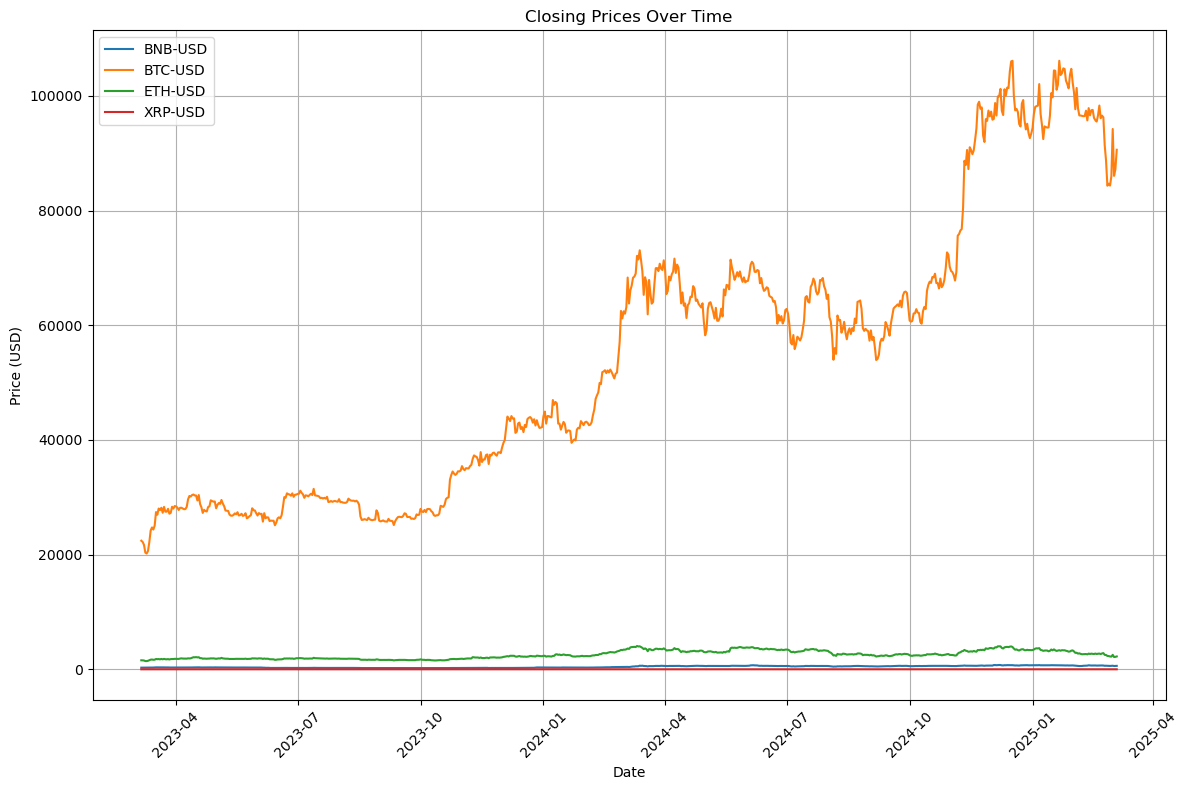

In [25]:
plt.figure(figsize=(12, 8))
for ticker in ticker_data:
    plt.plot(ticker_data[ticker].index, ticker_data[ticker]["Close"], label=ticker)
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

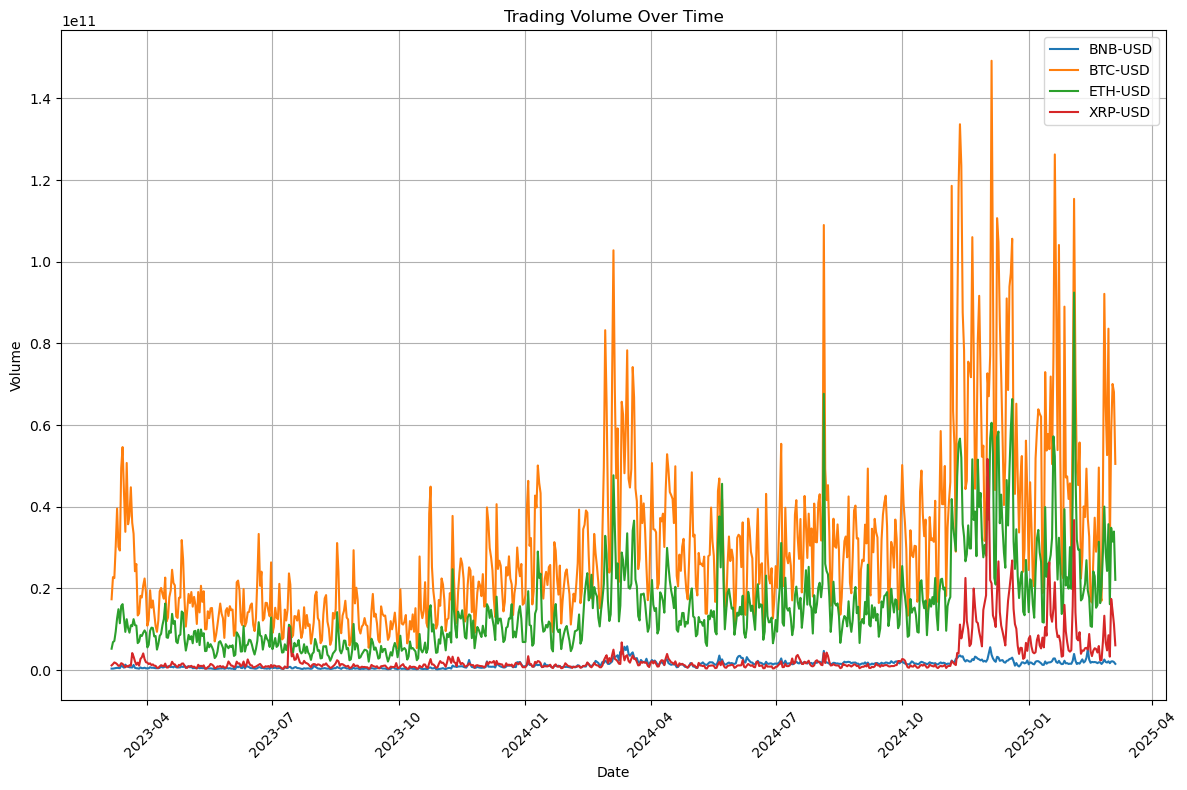

In [27]:
# 2. Plot Volume Trends
plt.figure(figsize=(12, 8))
for ticker in ticker_data:
    plt.plot(ticker_data[ticker].index, ticker_data[ticker]["Volume"], label=ticker)
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df_btc = pd.read_csv("BTC-USD_processed.csv", index_col="Date", parse_dates=True)
df_bnb = pd.read_csv("BNB-USD_processed.csv", index_col="Date", parse_dates=True)
df_eth = pd.read_csv("ETH-USD_processed.csv", index_col="Date", parse_dates=True)
df_xrp = pd.read_csv("XRP-USD_processed.csv", index_col="Date", parse_dates=True)

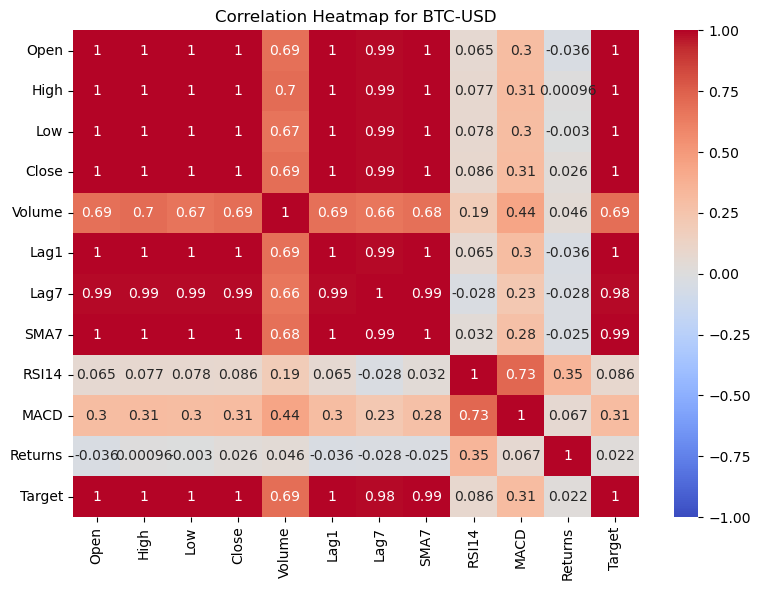

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_btc.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for BTC-USD")
plt.tight_layout()
plt.show()

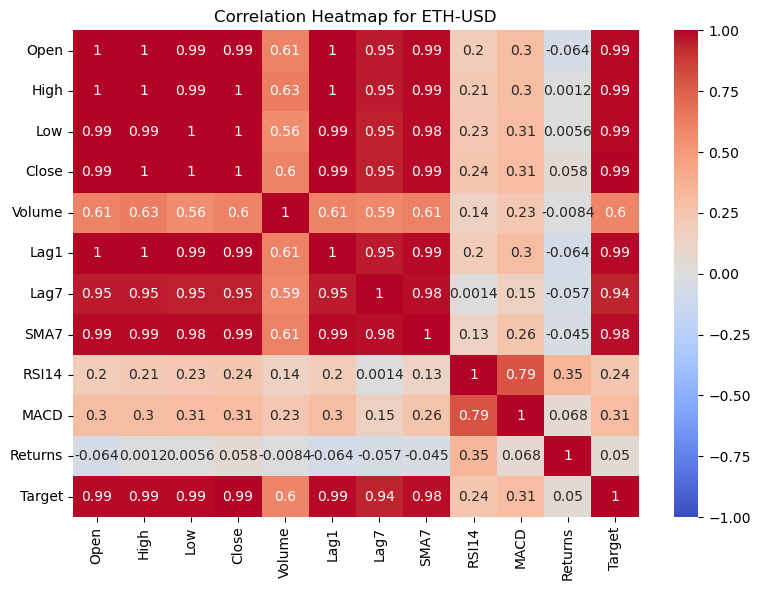

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_eth.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for ETH-USD")
plt.tight_layout()
plt.show()

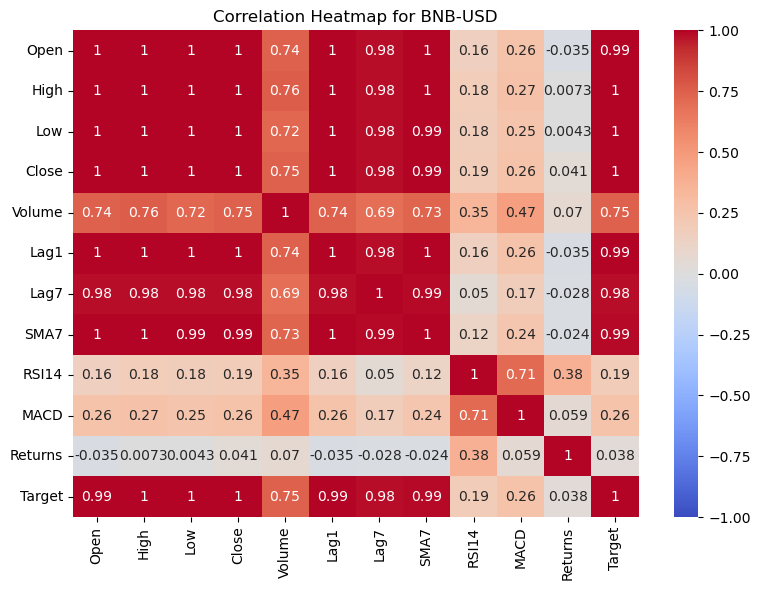

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_bnb.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for BNB-USD")
plt.tight_layout()
plt.show()

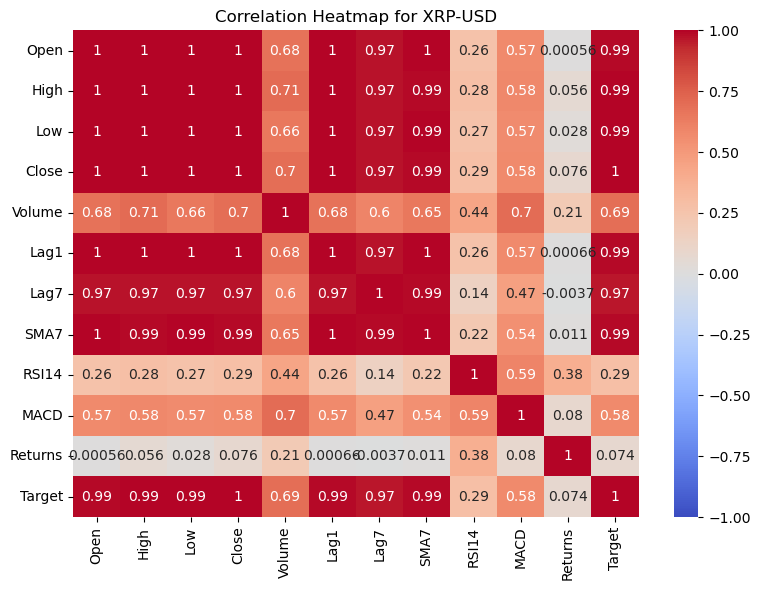

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_xrp.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for XRP-USD")
plt.tight_layout()
plt.show()